**Kth Nearest Neighbour Classifier**

In [1]:
# import packages to read csv file, create data frame, and plot data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read csv file and create data frame
df = pd.read_csv('knndata.csv')
df

,id,height,age,weight
0,1,5.00,45,77.0
1,2,5.11,26,47.0
2,3,5.60,30,55.0
3,4,5.90,34,59.0
4,5,4.80,40,72.0
5,6,5.80,36,60.0
6,7,5.30,19,40.0
7,8,5.80,28,60.0
8,9,5.50,23,45.0
9,10,5.60,32,58.0


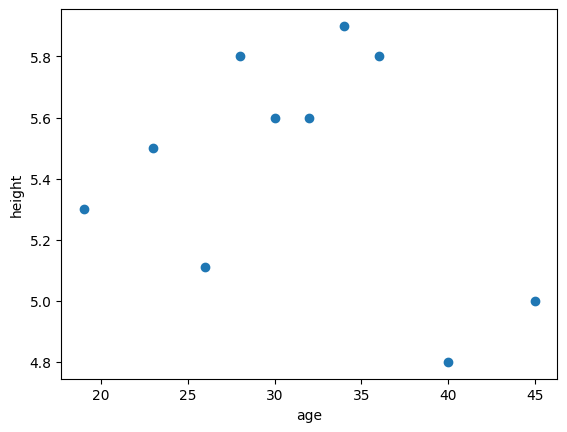

In [3]:
# All row except last is training data
train_df = df.iloc[:-1, :]

# Plot data age vs height
plt.scatter(train_df['age'], train_df['height'])
plt.xlabel('age')
plt.ylabel('height')
plt.show()

In [4]:
# Create a new data frame with only age and height
df1 = df[['age', 'height']]
df1

,age,height
0,45,5.00
1,26,5.11
2,30,5.60
3,34,5.90
4,40,4.80
5,36,5.80
6,19,5.30
7,28,5.80
8,23,5.50
9,32,5.60


In [5]:
# Create a new data frame with only weight
df2 = train_df[['weight']]
df2

,weight
0,77.0
1,47.0
2,55.0
3,59.0
4,72.0
5,60.0
6,40.0
7,60.0
8,45.0
9,58.0


In [6]:
# Find Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Find K nearest neighbors
def knn(X, y, test_point, k=5):
    vals = []
    for i in range(X.shape[0]-1):
        d = euclidean_distance(test_point, X[i])
        vals.append((d, [X[i][0], X[i][1], y[i][0]]))
    vals = sorted(vals)
    neighbors = vals[:k]
    return neighbors

test_point = df1.iloc[-1]
test_point

age       38.0
height     5.5
Name: 10, dtype: float64

In [7]:
# Predict the weight of the 11th person
def predict(X, y, test_point, k=5):
    neighbors = knn(X, y, test_point, k)
    neighbor_weight = []
    for i in range(len(neighbors)):
        neighbor_weight.append(neighbors[i][1][2])
    return neighbors, np.mean(neighbor_weight)

# Predict the weight of the 11th person
res = predict(df1.values, df2.values, test_point)
res

([(2.0223748416156684, [36.0, 5.8, 60.0]),
  (2.118962010041709, [40.0, 4.8, 72.0]),
  (4.019950248448356, [34.0, 5.9, 59.0]),
  (6.000833275470999, [32.0, 5.6, 58.0]),
  (7.0178344238090995, [45.0, 5.0, 77.0])],
 65.2)

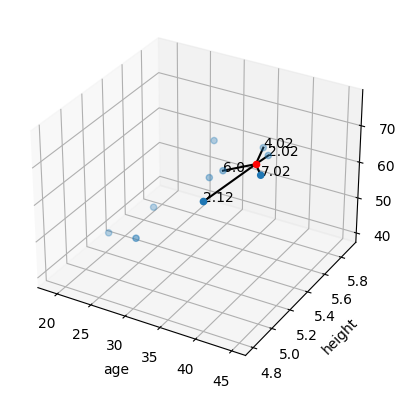

In [8]:
# 3d Plot the predicted weight of the 11th person with lines being drawn to the nearest neighbors
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['age'][:-1], df1['height'][:-1], df2['weight'])
ax.scatter(test_point['age'], test_point['height'], res[1], color='red')
for i in range(len(res[0])):
    ax.plot([test_point['age'], res[0][i][1][0]], [test_point['height'], res[0][i][1][1]], [res[1], res[0][i][1][2]], color='black')
    # label the lines with the distance
    ax.text(res[0][i][1][0], res[0][i][1][1], res[0][i][1][2], str(round(res[0][i][0], 2)))
ax.set_xlabel('age')
ax.set_ylabel('height')
ax.set_zlabel('weight')
plt.show()